In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
eval_set = np.load('/lmh_data/data/sclab/sclab/eval_dataset.npy', allow_pickle=True)

preds = np.load('/lmh_data/data/sclab/sclab/tmp/PDGFRA/evaluate.npy', allow_pickle=True)
preds_old = np.load('/lmh_data/data/sclab/sclab/tmp/PDGFRA_old/evaluate.npy', allow_pickle=True)

In [3]:
def get_df(preds):
    data = pd.DataFrame()
    for i in range(len(eval_set)):
#         if eval_set[i]['identity'] == 'fake':
#             continue
        _pearson = stats.pearsonr(preds[i]['predict'], preds[i]['target'])[0]
        _data = pd.DataFrame({'pearson': [_pearson], 'cell_type': [eval_set[i]['cell_type']]})
        data = pd.concat([data, _data], axis=0, ignore_index=True)
#         data.append(_data, ignore_index=True)
    return data

preds_info, preds_old_info = get_df(preds), get_df(preds_old)
preds_info['loss'] = 'control'
preds_old_info['loss'] = 'MSE'
data = pd.concat([preds_info, preds_old_info], axis=0, ignore_index=True)
data

,pearson,cell_type,loss
0,0.911136,ODC,control
1,0.886920,OPC,control
2,0.992076,OPC,control
3,0.774242,ODC,control
4,0.951122,ODC,control
...,...,...,...
693,0.625152,Astro,MSE
694,0.816966,ODC,MSE
695,0.755370,Astro,MSE
696,0.912553,ODC,MSE


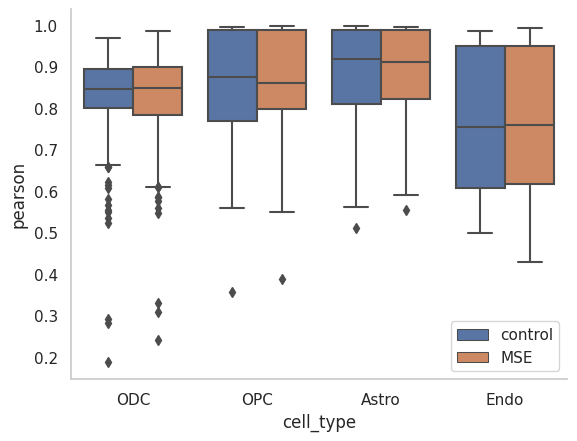

In [4]:
sns.set_theme(style="whitegrid")
sns.boxplot(
    x='cell_type', y='pearson', data=data, hue='loss', 
#     palette=colors, saturation=1, linewidth=figure_size['very_small']
)

sns.despine()
# set_Border(plt.gca())
# plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
# plt.legend(frameon=False, markerscale=2, borderpad=0, borderaxespad=0, fontsize=figure_size['middle'])
plt.legend()
plt.grid(False)
# plt.xlabel("SRED Level", fontsize=figure_size['ultra'])
# plt.ylabel("TAD Volume", fontsize=figure_size['ultra'])

# plt.savefig('figure_file/{}.pdf'.format(title), format='pdf', bbox_inches='tight')
plt.show()